# CNN model for Cat and Dog data


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.models import load_model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import os
from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

# 5. Build your own dataset by collecting images from the internet for example:
- Transportation images (Airplanes, Trains, Cars, ..)
- Animals (Cats, Dogs, ..)

In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\PetImages\\Cat\\"
TRAINING_CATS_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\training\\cats\\"
TESTING_CATS_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\testing\\cats\\"
DOG_SOURCE_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\PetImages\\Dog\\"
TRAINING_DOGS_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\training\\dogs\\"
TESTING_DOGS_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\testing\\dogs\\"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [15]:
print(len(os.listdir(TRAINING_CATS_DIR)))
print(len(os.listdir(TESTING_CATS_DIR)))
print(len(os.listdir(TRAINING_DOGS_DIR)))
print(len(os.listdir(TESTING_DOGS_DIR)))

11250
1250
11250
1250


In [30]:
TRAINING_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\training\\"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_data = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "C:\\Users\\nikur\\OneDrive\\Desktop\\01 Python and Deep Learning Programming\\Assignment 6\\Part 1\\cats-v-dogs\\testing\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
test_data = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## 5.1 Train the model on your dataset and report the accuracy.

In [31]:
image_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

image_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = image_model.fit(train_data, epochs=10, verbose=1, validation_data=test_data)

Epoch 1/10
225/225 [==============================] - 915s 4s/step - loss: 0.6855 - accuracy: 0.6257 - val_loss: 0.6484 - val_accuracy: 0.6460
Epoch 2/10
225/225 [==============================] - 603s 3s/step - loss: 0.5223 - accuracy: 0.7379 - val_loss: 0.5158 - val_accuracy: 0.7372
Epoch 3/10
225/225 [==============================] - 410s 2s/step - loss: 0.4503 - accuracy: 0.7875 - val_loss: 0.4567 - val_accuracy: 0.7836
Epoch 4/10
225/225 [==============================] - 433s 2s/step - loss: 0.3953 - accuracy: 0.8223 - val_loss: 0.4139 - val_accuracy: 0.8004
Epoch 5/10
225/225 [==============================] - 406s 2s/step - loss: 0.3328 - accuracy: 0.8549 - val_loss: 0.5061 - val_accuracy: 0.7572
Epoch 6/10
225/225 [==============================] - 413s 2s/step - loss: 0.2740 - accuracy: 0.8844 - val_loss: 0.3987 - val_accuracy: 0.8204
Epoch 7/10
225/225 [==============================] - 605s 3s/step - loss: 0.2104 - accuracy: 0.9160 - val_loss: 0.4227 - val_accuracy: 0.8196

## Model accuracy

In [35]:
# Save the model
image_model.save('image_model.h5')

# Loading the model
image_saved_model = load_model('image_model.h5')

In [38]:
# Model evaluation
scores = image_model.evaluate(test_data, verbose=0)
print("Test Accuracy for Image classification model: %.2f%%" % (scores[1]*100))

Test Accuracy for Image classification model: 79.68%


## 5.2 Plot the training and validation accuracy.

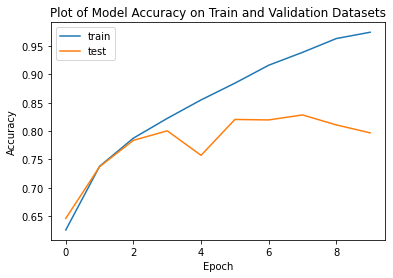

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()